# Project-1 : Heart Disease Prediction Task

### Step-0. Import the dependencies of projects

In [2]:
# data analysis
import pandas as pd 
# numerical computations
import numpy as np 

# machine learning tasks
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# data visualization
import matplotlib.pyplot as plt 
import seaborn as sns

### Step-1 : Problem Statement
Task to build a patient reliable model that can predict the presence of heart disease or not presence of heart disease in a patient by providing some test value to the model.

### Step-2 : Relevent Dataset
The I have taken the kaggle dataset of Heart disease prediction

### Step-3 : Loading, Exploring, Visualizing and Feature Analysis of Dataset


#### 3.1 Load the dataset

In [3]:
data = pd.read_csv("data/Heart_Disease_Prediction.csv", sep=',')

#### 3.2 Explore the Dataset and Perform Feature Analysis

In [4]:
# Let's look at the data
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [5]:
# Let's find the shape of data and size with it's list of column 0
print(data.shape)
print(data.size)
print(data.columns)

(270, 14)
3780
Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')


In [6]:
features_list = data.columns[0:-1].values
print("List of features :", features_list)
label = [data.columns[-1]]
print("List of label :", label)

List of features : ['Age' 'Sex' 'Chest pain type' 'BP' 'Cholesterol' 'FBS over 120'
 'EKG results' 'Max HR' 'Exercise angina' 'ST depression' 'Slope of ST'
 'Number of vessels fluro' 'Thallium']
List of label : ['Heart Disease']


- Data is of size 270 with shape(270, 1) and List of columns that it has are : `['Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease']`, our task is to make prediction that a person has heart disease or not thus the lost column we consider as label : `['Heart Disease']` and remaining columns as features of data that has some relation with label.

In [7]:
# Let's get some information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

- Our data contain 17 columns and each columns with 270 entries with data type `float64` for `ST depression` and for remaining features, it is `int64`. The our target label data types are the object i.e some string type value to each entries. It is a very small dataset according to ml standard. 

In [8]:
# Let's get a statistical discription of the features and label of data
data.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


The nature of each features in the column(numerical attributes) like Total number of entries that each attributes has along with some discriptive statistics like : `mean, standard deviation, min, max and differen quartile ranges`.

In [9]:
# Let's know the distribution of the target classes
data['Heart Disease'].value_counts()

Absence     150
Presence    120
Name: Heart Disease, dtype: int64

- Our `Heart Disease` label variable has 2 classes : `['Presence':120, 'Absence':150]` via seeing the number of values to each class and making a comparision we can say the it has a small imbalance in the dataset but we can ignore it. if our model does't perform well then we use different sampling method to deal with imbalance in the data.

#### 3.3 Visualize the dataset

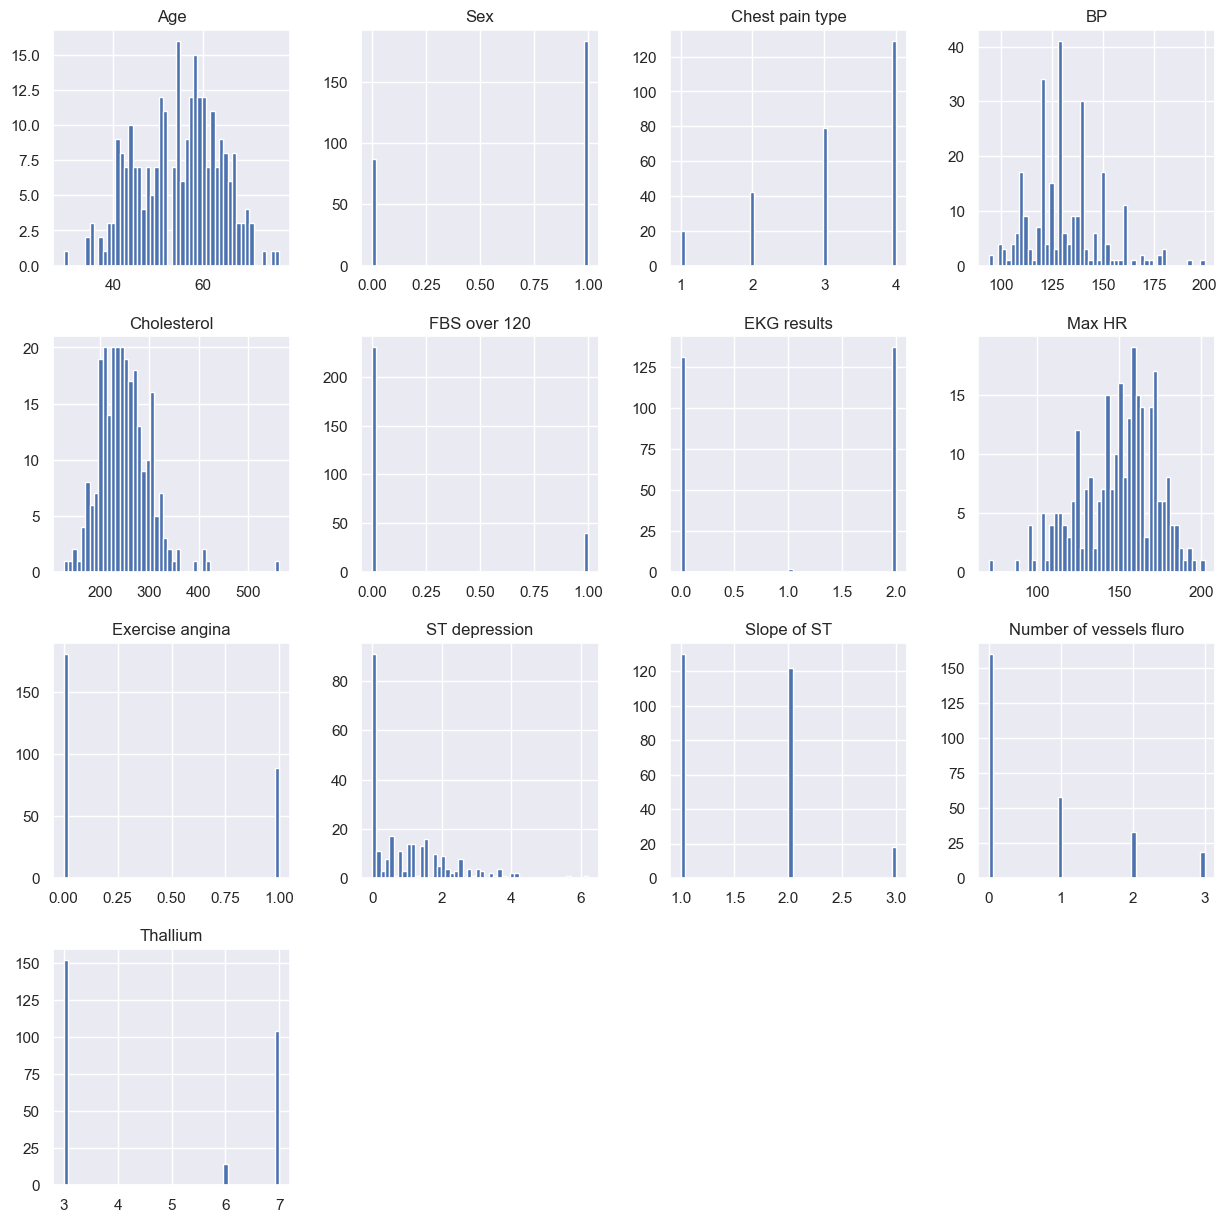

In [10]:
# What we have seen above in terms of numbers let's visualize them
sns.set()
data.hist(bins=50, figsize=(15, 15))
plt.show()

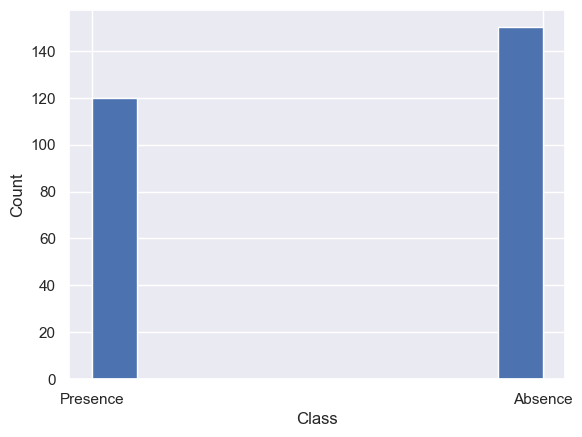

In [11]:
data['Heart Disease'].hist()
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

- Let's See How features are correlated among them s.t we can have an intution about the correctedness of features for our label attribute.

In [12]:
corr_matrix = data.corr()
corr_matrix

C:\Users\irpra\AppData\Local\Temp\ipykernel_1988\184011309.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
Age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100
Sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046
Chest pain type,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659
BP,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045
Cholesterol,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836
FBS over 120,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237
EKG results,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337
Max HR,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397
Exercise angina,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449
ST depression,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333


<Axes: >

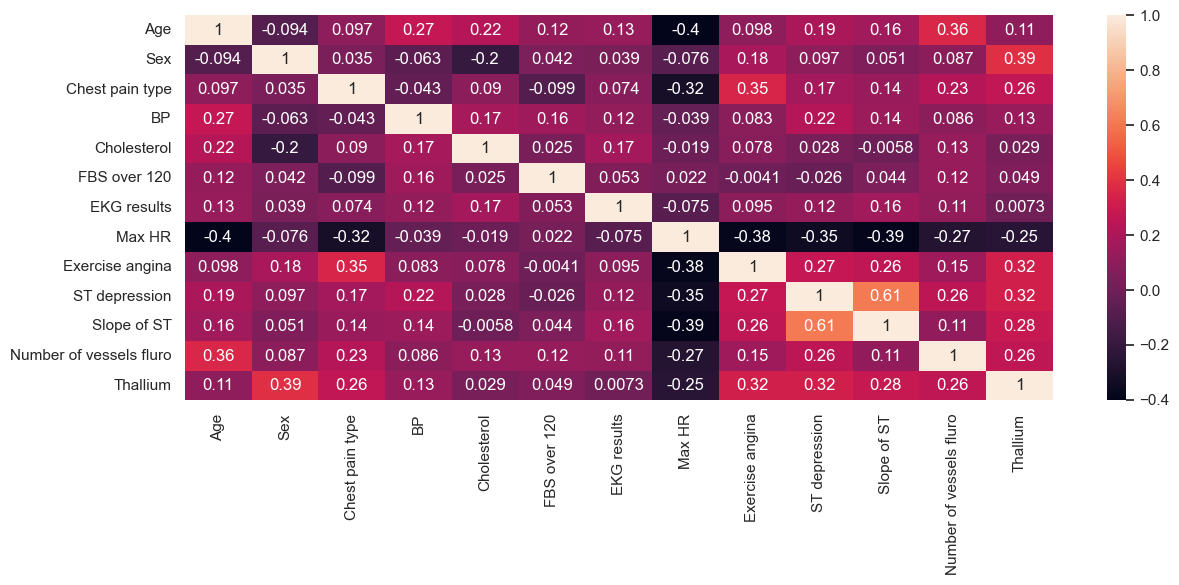

In [13]:
plt.figure(figsize=(14, 5))
sns.heatmap(corr_matrix, annot=True)

### Step-4 : Data Cleaning and Preprocessing

#### 4.1 Data Cleaning and Data Preprocessing

In [14]:
# Let's seperate the features and labels from training data
X = data.drop('Heart Disease', axis=1)
Y = data['Heart Disease'].copy()
print(X.columns)
print(Y[0:5])


Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium'],
      dtype='object')
0    Presence
1     Absence
2    Presence
3     Absence
4     Absence
Name: Heart Disease, dtype: object


In [15]:
# Let's check the null entries in data
X.isna().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
dtype: int64

In [16]:
X.median()

Age                         55.0
Sex                          1.0
Chest pain type              3.0
BP                         130.0
Cholesterol                245.0
FBS over 120                 0.0
EKG results                  2.0
Max HR                     153.5
Exercise angina              0.0
ST depression                0.8
Slope of ST                  2.0
Number of vessels fluro      0.0
Thallium                     3.0
dtype: float64

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=21)

In [18]:
print(X_train.shape, Y_train.shape)

(216, 13) (216,)


In [19]:
print(X_test.shape, Y_test.shape)

(54, 13) (54,)


### Step-5 : Machine Learning Algorithm

#### 5.1 Model selection

In [137]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
print(model)

LogisticRegression(max_iter=1000)


#### 5.2 Model Training 

In [138]:
model.fit(X_train.values, Y_train.values)

LogisticRegression(max_iter=1000)

#### 5.3 Model Evaluation

In [139]:
Train_Pred = model.predict(X_train.values)
Train_Accur = accuracy_score(Train_Pred, Y_train.values)
print("The training Accuracy : ", Train_Accur)

The training Accuracy :  0.8564814814814815


In [140]:
# Let's print the test accuracy
test_pred = model.predict(X_test.values)
test_acc = accuracy_score(test_pred, Y_test.values)
print("The Test accuracy :", test_acc)

The Test accuracy : 0.8333333333333334


In [157]:
l = model.coef_
l

array([[-0.01704241,  1.03239218,  0.69380359,  0.02004552,  0.00331101,
        -0.16199058,  0.27752331, -0.01641858,  0.64410088,  0.38696866,
         0.2126454 ,  0.93863527,  0.38703327]])

In [156]:
np.mean(l)

0.33853904111251043

In [146]:
model.intercept_

array([-6.81186037])

Now you can see that model coefficient are negative specially it's intercept means that when a normal person data will be feed into the model it will predict the negative i.e not presence of heart disease. So our model is biased towards the discrease in likelihood of the heart disease presence. thus our model is reliable for patient.

<Axes: >

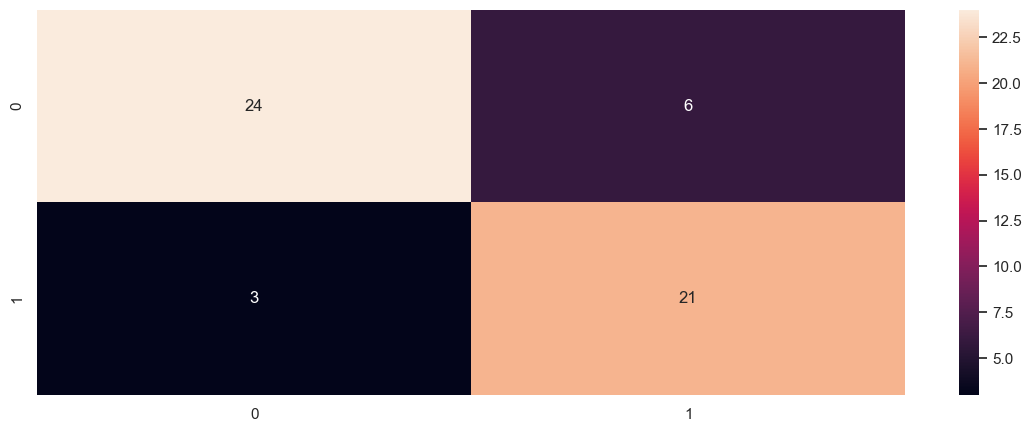

In [141]:
matrix = confusion_matrix(Y_test.values, test_pred)
plt.figure(figsize=(14, 5))
sns.heatmap(matrix, annot=True)

#### 5.4 Model Prediction

In [142]:
input = np.array([5, 0, 5, 10, 100, 0, 1, 142, 1, 1.1, 2, 0, 8])
input = input.reshape(1, -1)
prediction = model.predict(input)
if prediction[0] == 'Presence':
    print("The Person has a Heart Disease")
else:
    print("The Persion does't have a heart disease")


The Persion does't have a heart disease


In [143]:
input = np.array([50, 0, 5, 100, 300, 0, 1, 142, 1, 1.1, 2, 0, 8])
input = input.reshape(1, -1)
prediction = model.predict(input)
if prediction[0] == 'Presence':
    print("The Person has a Heart Disease")
else:
    print("The Persion does't have a heart disease")


The Person has a Heart Disease


### Step-6 : Preparing a report

In [144]:
report = classification_report(Y_test.values, test_pred)
print(report)

              precision    recall  f1-score   support

     Absence       0.89      0.80      0.84        30
    Presence       0.78      0.88      0.82        24

    accuracy                           0.83        54
   macro avg       0.83      0.84      0.83        54
weighted avg       0.84      0.83      0.83        54



1. The Accuracy of model on test data is $83%$ means it correctly predicted the presence or absence of heart disease in $83%$ of cases on test data.
2. The Precision for predicting the presence $.78$ is less than the predicting absence $.89$ means the model is reliable for predicting the patients without heart disease.
3. The Recall for predicting the presence is higher than the Absence which is not good according to our model to be patient reliable but
4. f1-score which is a balances the precision and recall is higher for absence prediction thus we can say our model is patient reliable.
